In [1]:
#Cargar las librerias para el análisis de las Series de Tiempo
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


Matplotlib is building the font cache; this may take a moment.


In [3]:
# Si el archivo es CSV
#df = pd.read_csv("ruta_a_tu_archivo.csv", parse_dates=["fecha"], index_col="fecha")

# Ruta al archivo en la carpeta de Descargas
ruta_archivo = r"C:\\Users\\Becario SAIS\\Downloads\\Producto_Interno.xlsx" 

# Cargar el archivo con la hoja
df = pd.read_excel(ruta_archivo, sheet_name =1)  # Índice 1 porque las hojas comienzan desde 0

# Mostrar las primeras filas
print(df.head())

  observation_date  A191RL1Q225SBEA
0       1947-04-01             -1.0
1       1947-07-01             -0.8
2       1947-10-01              6.4
3       1948-01-01              6.2
4       1948-04-01              6.8


                  PIB
observation_date     
1947-04-01       -1.0
1947-07-01       -0.8
1947-10-01        6.4
1948-01-01        6.2
1948-04-01        6.8


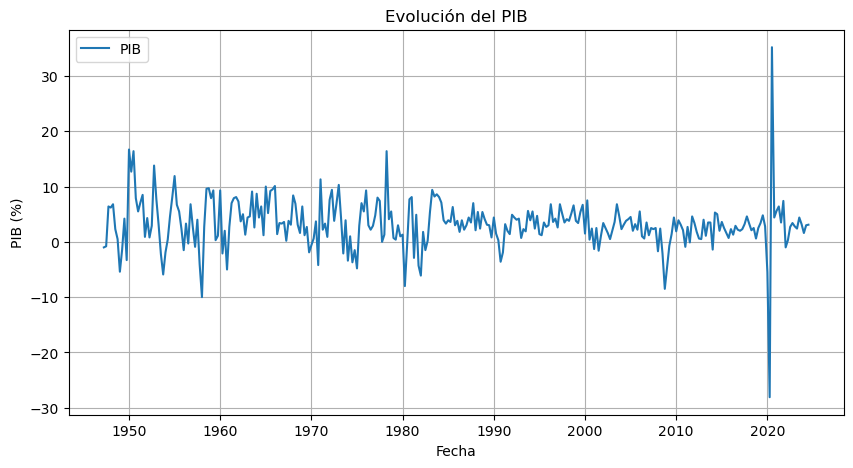

In [4]:
# Convertir la columna 'observation_date' en índice
df.set_index("observation_date", inplace=True)

# Renombrar la columna de valores
df.rename(columns={"A191RL1Q225SBEA": "PIB"}, inplace=True)

# Mostrar las primeras filas
print(df.head())

# Graficar la serie de tiempo
plt.figure(figsize=(10,5))
plt.plot(df.index, df["PIB"], label="PIB")
plt.title("Evolución del PIB")
plt.xlabel("Fecha")
plt.ylabel("PIB (%)")
plt.legend()
plt.grid()
plt.show()

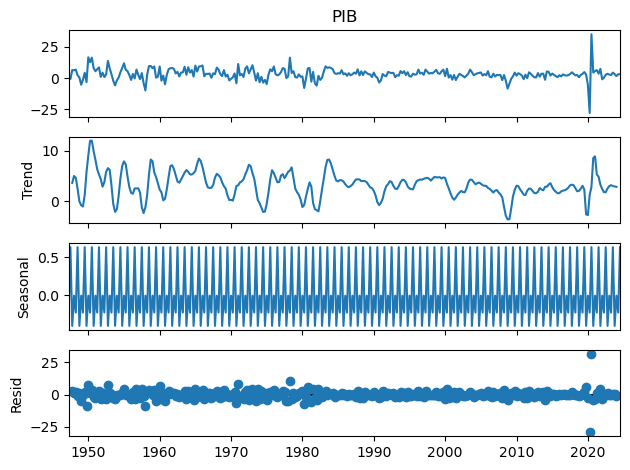

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie
result = seasonal_decompose(df["PIB"], model='additive', period=4)  # Periodo = 4 porque es trimestral
result.plot()
plt.show()


In [9]:
#Prueba de estacionariedad (Dickey-Fuller)

from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df["PIB"])
print(f"Estadístico ADF: {adf_test[0]}")
print(f"P-valor: {adf_test[1]}")

if adf_test[1] < 0.05:
    print("La serie es estacionaria.")
else:
    print("La serie no es estacionaria. Se recomienda diferenciarla.")



Estadístico ADF: -15.364715442430997
P-valor: 3.573672456160407e-28
La serie es estacionaria.


C:\Users\Becario SAIS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Becario SAIS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Becario SAIS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\Becario SAIS\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3014: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\Users\Becario SAIS\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1420: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared

                               SARIMAX Results                                
Dep. Variable:                    PIB   No. Observations:                  310
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   0.000
Date:                Tue, 28 Jan 2025   AIC                             10.000
Time:                        14:55:36   BIC                             28.667
Sample:                    04-01-1947   HQIC                            17.463
                         - 07-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       4.018e-05         -0       -inf      0.000    4.02e-05    4.02e-05
ar.L2          1.0000   1.93e-08   5.19e+07      0.000       1.000       1.000
ma.L1         -2.0000         -0        inf      0.0

C:\Users\Becario SAIS\AppData\Local\Temp\ipykernel_10360\3554170573.py:21: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(pd.date_range(df.index[-1], periods=9, freq="Q")[1:], forecast, label="Predicción", linestyle="--", color="r")


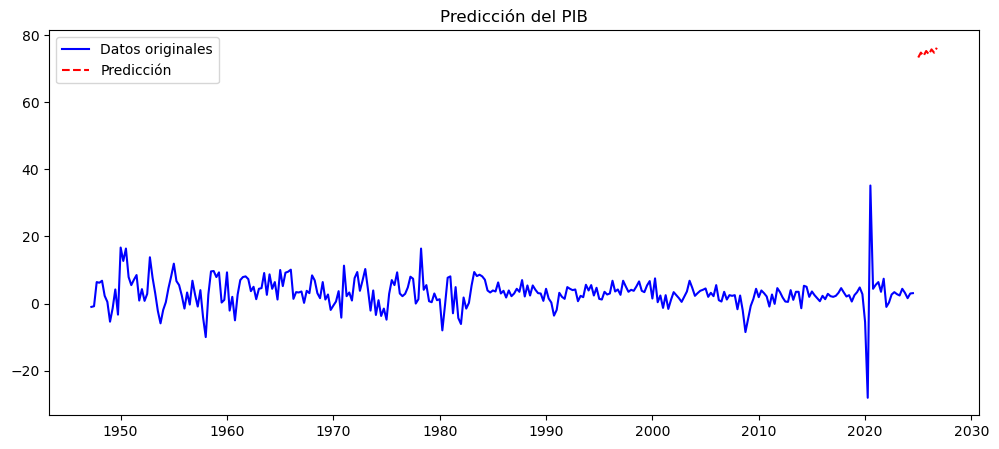

In [10]:
#Modelo ARIMA

from statsmodels.tsa.arima.model import ARIMA

# Diferenciación si es necesario
df["PIB_diff"] = df["PIB"].diff()

# Modelo ARIMA(2,1,2) (p=2, d=1, q=2) -> Ajusta los parámetros según ACF/PACF
model = ARIMA(df["PIB"], order=(2,1,2))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Predicción de los próximos 8 trimestres
forecast = model_fit.forecast(steps=8)

# Graficar la predicción
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["PIB"], label="Datos originales", color="b")
plt.plot(pd.date_range(df.index[-1], periods=9, freq="Q")[1:], forecast, label="Predicción", linestyle="--", color="r")
plt.legend()
plt.title("Predicción del PIB")
plt.show()
